## 1

**Question:**

Please do regression by two different algorithms with one dataset. Select one dataset public which
consists of more than 5 features. Please do some tasks Exploratory Data Analysis (EDA), feature
engineering and some pre-processing if you feel need it. Please explain each your task results


**Answer :**


### DATASET

Dataset used is possum from kaggle

Ref :
https://www.kaggle.com/datasets/abrambeyer/openintro-possum 

In [2]:
# Load Library 
import pandas as pd

# import dataset
dt = pd.read_csv('./data.csv')

### Explanotary Data Analysis
Following steps are used as explanatory data analysis:
1. Find data shape
2. Find data type
3. Get sample of particular data
4. Get overall data type

In [3]:
from ydata_profiling import ProfileReport

ProfileReport(dt, title="Profiling Report")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### Data Preprocess

What i did in data preprocessing are:
- Feature selection 
- Remove Missing target
- Feature renaming
- Data transformation
- Data splitting

In [4]:
dt.columns

Index(['case', 'site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth',
       'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')

In [58]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler

# Feature Selection 
df = dt[['age', 'hdlngth', 'skullw', 'totlngth','taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']]

# Remove missing taget
df = df.dropna()

# Label Encoder
label_encoder = LabelEncoder()
# df['sex'] = label_encoder.fit_transform(df['sex'])
# df['Pop'] = label_encoder.fit_transform(df['Pop'])

# Apply normalisation
ss = StandardScaler()
for i in df.drop(columns=['age']).columns.to_list():
    df[i] = ss.fit_transform(df[[i]])



In [59]:
# Data splitting
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(df.drop(columns=['age']), df[['age']], test_size = 0.2, random_state=2)

In [60]:
x_train

hdlngth    skullw  totlngth     taill  footlgth  earconch       eye  \
11  0.619580 -0.440645  1.132836 -0.789800  0.751886  0.709454  0.236859   
92 -1.008409 -0.958901 -1.261815  0.484478 -1.047004 -0.800372 -2.136433   
47  1.676346  2.021068 -0.543420 -1.554367 -0.341110 -0.800372  1.850698   
74  0.305407  0.369129  0.414441  0.484478 -0.500506 -0.627113  1.755766   
5   0.105479 -0.699773  0.773638 -0.789800  1.093447  1.352986 -0.807389   
..       ...       ...       ...       ...       ...       ...       ...   
46 -0.751358 -0.699773  0.414441  0.229622 -0.546047 -0.651864 -0.047936   
22 -0.065889 -0.278691  0.414441 -0.534944  1.002364  1.278733  0.331791   
75 -0.094450 -0.051954  0.414441  2.013611 -0.887608 -0.429103  2.610151   
15 -0.322940 -0.311082 -0.303955 -1.299511  1.047906  0.808459 -0.617526   
41 -2.122296 -0.926510 -2.459140 -2.573789 -1.297482  0.758956 -1.187116   

       chest     belly  
11  0.465334  0.133146  
92 -1.524030 -0.603717  
47  0.465334  0.870009  
74 -0.529348  0.317362  
5   1.460016 -0.235286  
..       ...       ...  
46 -1.026689  0.133146  
22  0.465334  0.870009  
75 -0.529348  0.133146  
15  0.465334 -0.235286  
41 -0.778018  0.133146  

[80 rows x 9 columns]

### Data processing

In data processing we use 2 different algorithm, namely liner regression and polynomial regression.

To test, we use mean square error that compare prediction and actual result.

Linier Regression Results
 OK
 MSE         :  4.48846949659521
 R2          :  -0.29882877165255106


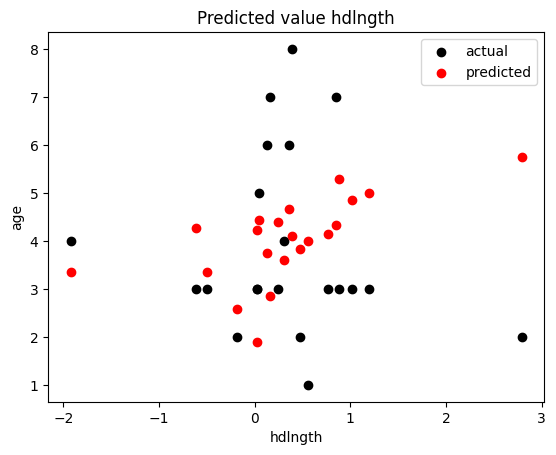

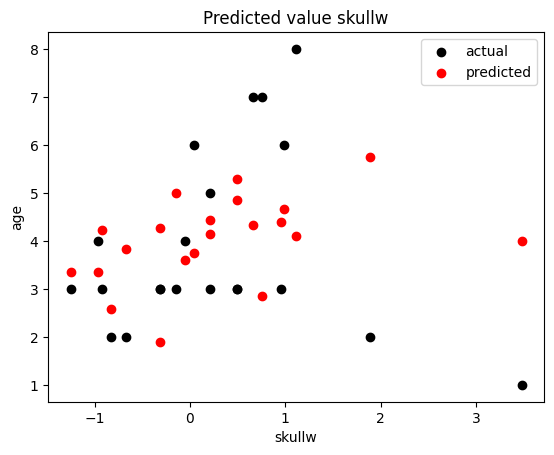

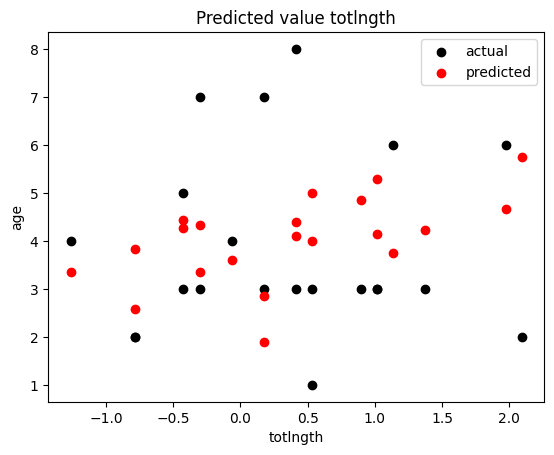

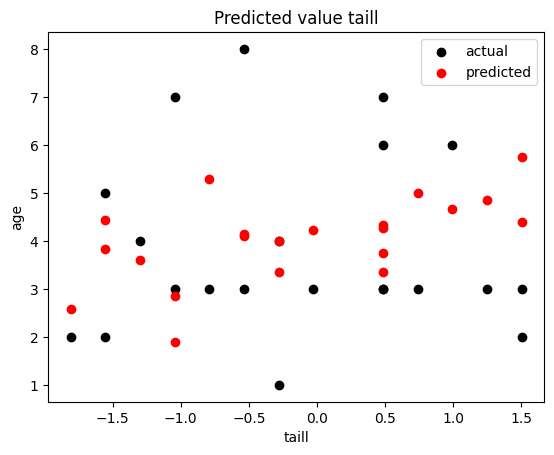

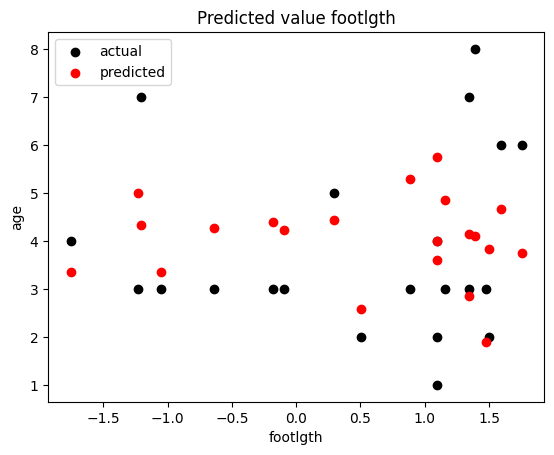

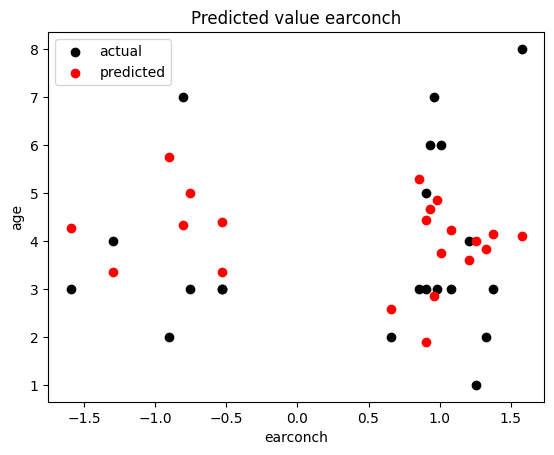

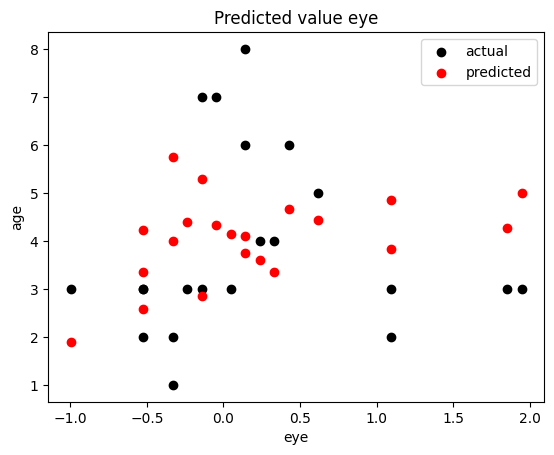

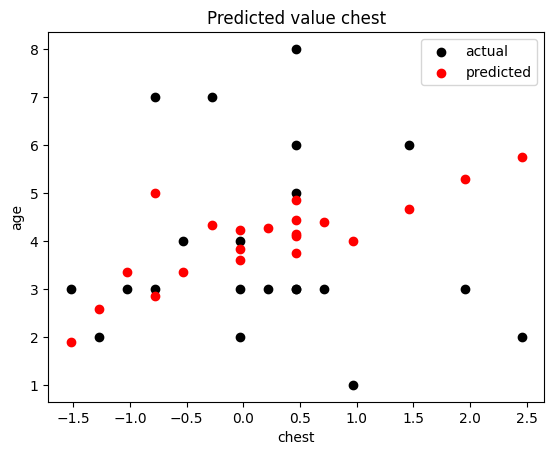

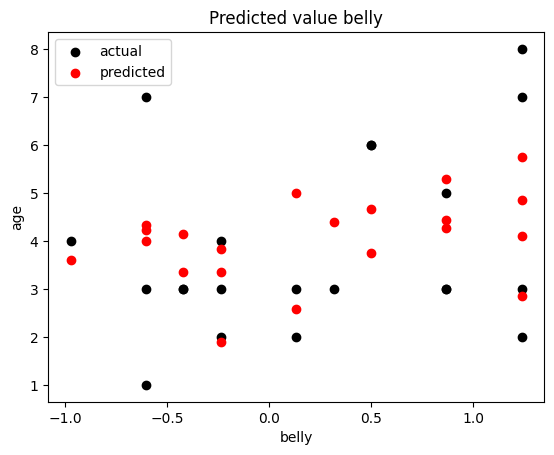

In [67]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
%matplotlib inline

# Linier Regression
regressor_linier = linear_model.LinearRegression()
regressor_linier.fit(x_train,y_train)

# Predict linier
Y_pred_train = regressor_linier.predict(x_train)
y_pred = regressor_linier.predict(x_test)

print("Linier Regression Results")

# print(" Coefficient : ", regressor_linier.coef_)
print(" MSE         : ", mean_squared_error(y_test, y_pred))
print(" R2          : ", r2_score(y_test, y_pred))

# # Draw Graph

for column in x_test.columns.to_list():
    plt.scatter(x_test[column], y_test, color='black', label="actual")
    plt.scatter(x_test[column], y_pred, color='red', label="predicted")
    plt.title(f"Predicted value {column}")
    plt.xlabel(f"{column}")
    plt.ylabel("age")
    plt.legend()
    plt.show()




Linier Regression Results
 MSE         :  9.476190476190476
 R2          :  -1.742125984251969


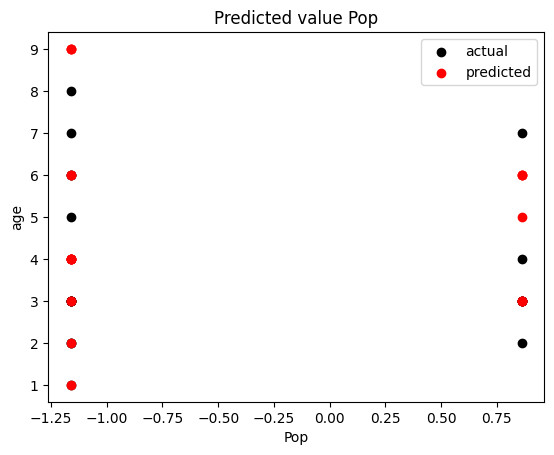

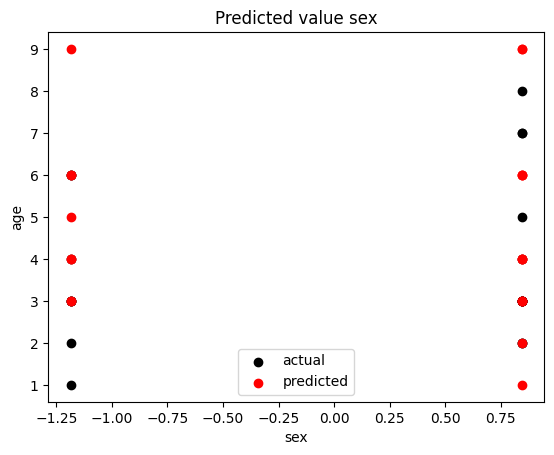

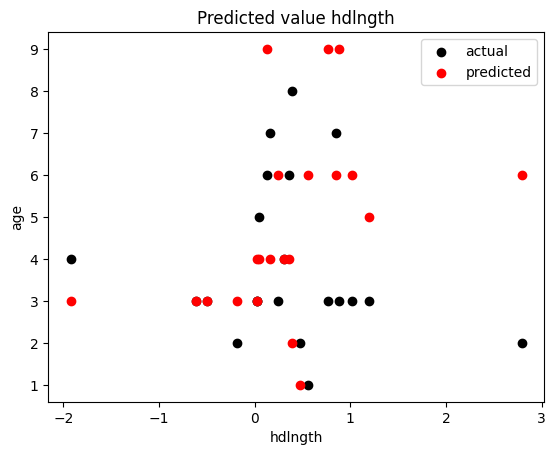

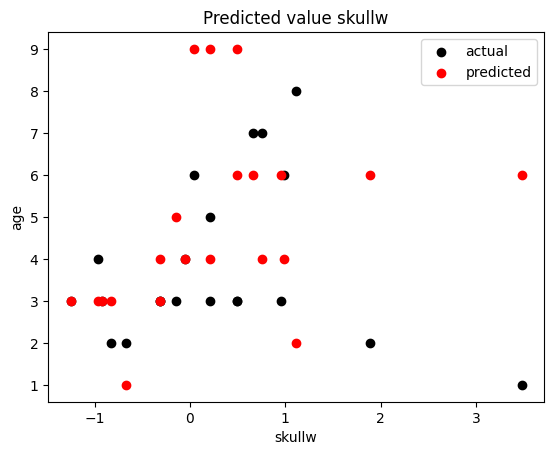

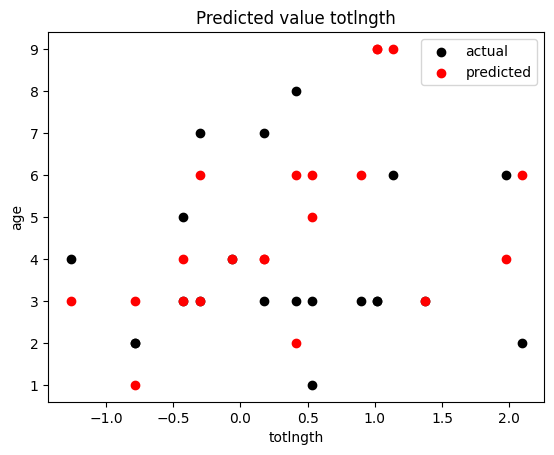

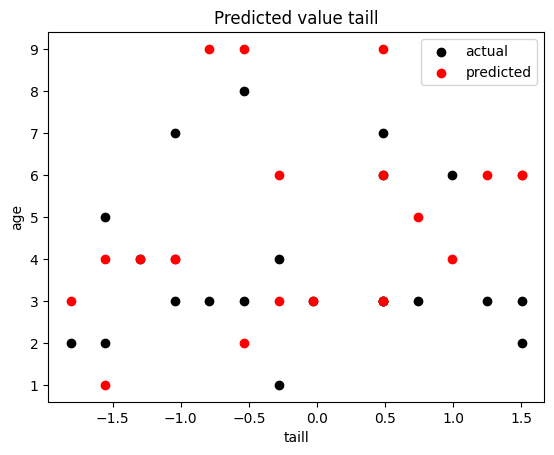

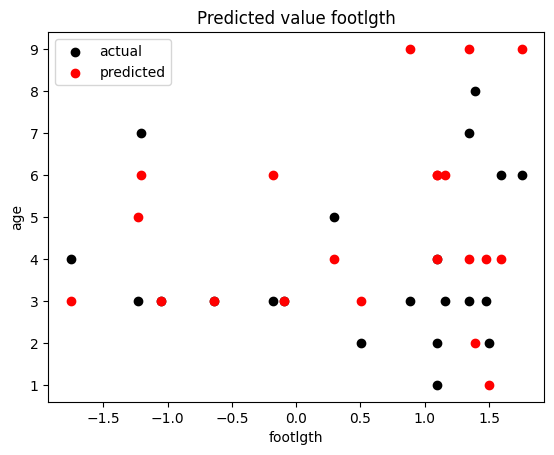

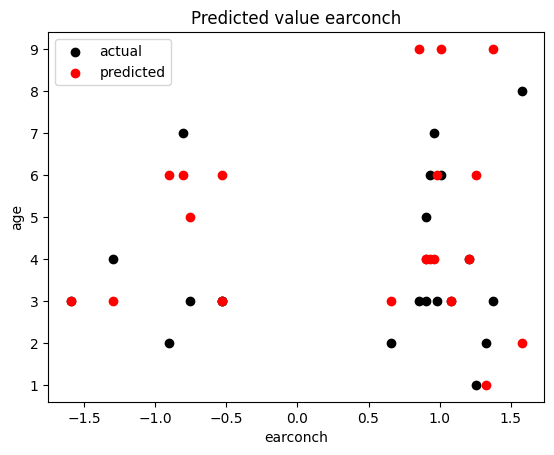

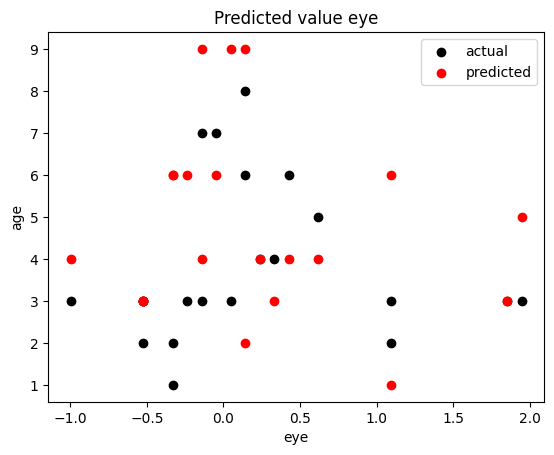

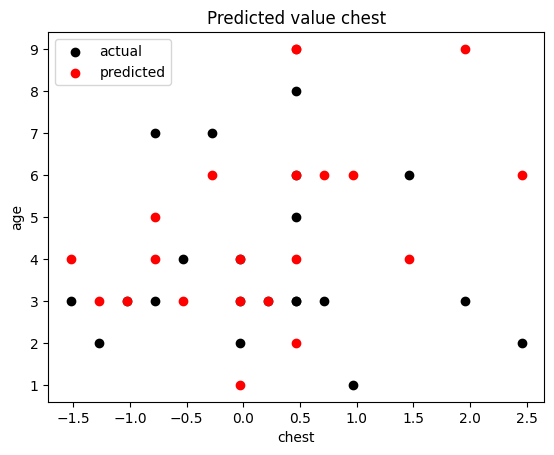

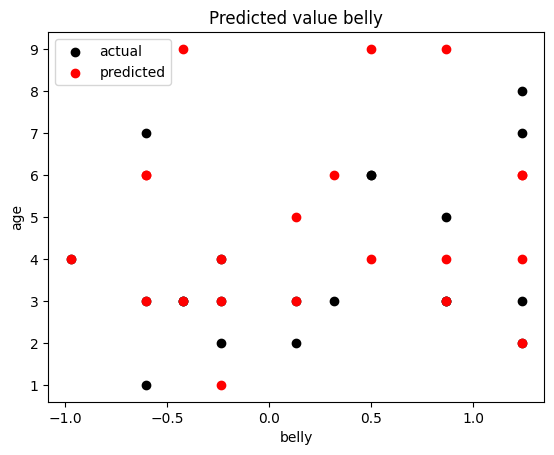

In [56]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

import matplotlib.pyplot as plt
%matplotlib inline

# Linier Regression
regressor = DecisionTreeRegressor()
regressor.fit(x_train,y_train)

# Predict linier
Y_pred_train = regressor.predict(x_train)
y_pred = regressor.predict(x_test)

print("Linier Regression Results")
# print(" Coefficient : ", regressor_linier.coef_)
print(" MSE         : ", mean_squared_error(y_test, y_pred))
print(" R2          : ", r2_score(y_test, y_pred))

# # Draw Graph

for column in x_test.columns.to_list():
    plt.scatter(x_test[column], y_test, color='black', label="actual")
    plt.scatter(x_test[column], y_pred, color='red', label="predicted")
    plt.title(f"Predicted value {column}")
    plt.xlabel(f"{column}")
    plt.ylabel("age")
    plt.legend()
    plt.show()


